In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import torch

        # Добавим путь к корневой директории проекта, чтобы импортировать main_config
        # Это может потребовать корректировки в зависимости от того, как вы запускаете Jupyter Lab/Notebook
module_path = os.path.abspath(os.path.join('..')) # Если ноутбук в ml_service/notebooks/
if module_path not in sys.path:
            sys.path.append(module_path)

from config import main_config

        # Настройки для лучшего отображения графиков (опционально)
plt.style.use('seaborn-v0_8-whitegrid') # или другой стиль
sns.set_palette("pastel")
pd.set_option('display.max_columns', None) # Показывать все колонки

In [29]:
train_file_path = main_config.PROCESSED_DATA_DIR / main_config.TRAIN_DATASET_FILENAME
try:
    train_df = pd.read_csv(train_file_path)
    print(f"Successfully loaded {train_file_path}")
    print(f"Shape of training data: {train_df.shape}")
except FileNotFoundError:
    print(f"ERROR: Training data file not found at {train_file_path}")
    print("Please ensure 'run_preprocess_data.py' was executed successfully.")
            # Здесь можно остановить выполнение ноутбука или обработать ошибку
    assert False, "Training data not found"


print("\nFirst 5 rows of the training data:")
print(train_df.head())

print("\nDataFrame Info:")
train_df.info()

Successfully loaded E:\Code\diplom\ml_service\data\processed\train_contracts.csv
Shape of training data: (36477, 16)

First 5 rows of the training data:
                                      address  \
0  0x3512594d19870dabac2e033f15fcc6d9abd606ba   
1  0xe5607d2053226b423f19b3ae01f9b8ec660314cb   
2  0x50325b5527eb8299581bce2eeb6c53b5661e1346   
3  0xa8a07e3fa28bd207e405c482ce8d02402cd60d92   
4  0x8d87c5b8cd2b0ddcf1814d2a6e24659775b5215f   

                                          sourcecode  reentrancy  \
0  pragma solidity ^0.4.25;\r contract one_eight ...           0   
1  pragma solidity ^0.4.23;\r contract Token {\r ...           0   
2  pragma solidity ^0.4.15;\r contract Base {\r  ...           0   
3  pragma solidity ^ 0.4.18;\r contract tokenReci...           0   
4  pragma solidity 0.4.25;\r library Math {\r  fu...           1   

   unchecked_low_calls  arithmetic  Other  access_control  denial_service  \
0                    0           1      1               2         

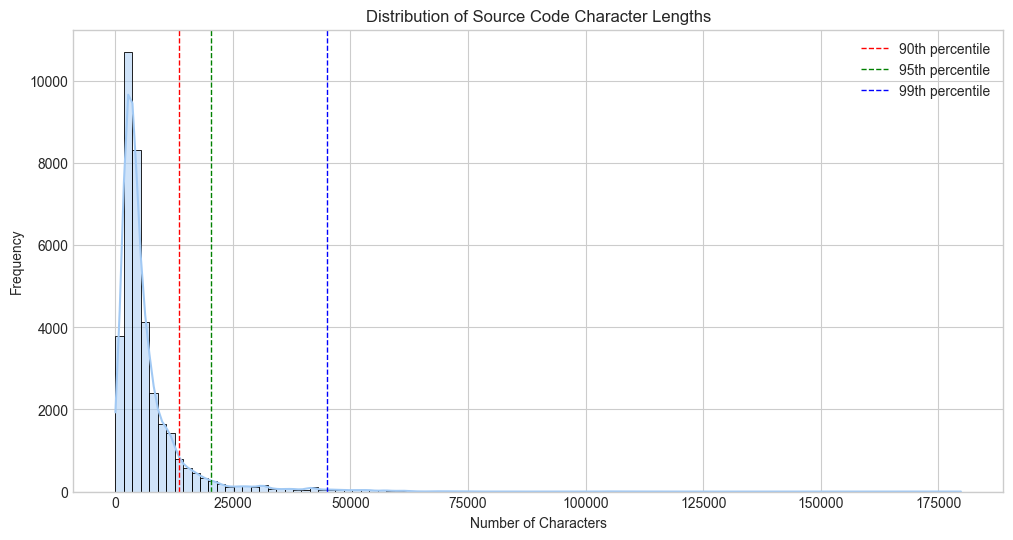


Descriptive statistics for code character length:
count     36477.000000
mean       6779.900896
std        8296.256035
min          28.000000
50%        4159.000000
75%        7519.000000
90%       13439.000000
95%       20300.400000
99%       45095.880000
99.9%     72612.292000
max      179787.000000
Name: code_char_length, dtype: float64


In [30]:
        # Анализ длины исходного кода
train_df['code_char_length'] = train_df[main_config.SOURCE_CODE_COLUMN].astype(str).apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(train_df['code_char_length'], bins=100, kde=True)
plt.title('Distribution of Source Code Character Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
        # Добавим вертикальные линии для перцентилей
plt.axvline(train_df['code_char_length'].quantile(0.90), color='red', linestyle='dashed', linewidth=1, label='90th percentile')
plt.axvline(train_df['code_char_length'].quantile(0.95), color='green', linestyle='dashed', linewidth=1, label='95th percentile')
plt.axvline(train_df['code_char_length'].quantile(0.99), color='blue', linestyle='dashed', linewidth=1, label='99th percentile')
plt.legend()
plt.show()

print("\nDescriptive statistics for code character length:")
print(train_df['code_char_length'].describe(percentiles=[.50, .75, .90, .95, .99, .999]))


Identified target columns: ['vuln_reentrancy', 'vuln_unchecked_low_calls', 'vuln_arithmetic', 'vuln_other', 'vuln_access_control', 'vuln_denial_service', 'vuln_time_manipulation']

Value counts for vuln_reentrancy (Normalized):
vuln_reentrancy
0    0.694218
1    0.305782
Name: proportion, dtype: float64

Value counts for vuln_unchecked_low_calls (Normalized):
vuln_unchecked_low_calls
0    0.695123
1    0.304877
Name: proportion, dtype: float64

Value counts for vuln_arithmetic (Normalized):
vuln_arithmetic
1    0.797653
0    0.202347
Name: proportion, dtype: float64

Value counts for vuln_other (Normalized):
vuln_other
1    0.598816
0    0.401184
Name: proportion, dtype: float64


C:\Users\crazy\AppData\Local\Temp\ipykernel_11984\4121731075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])
C:\Users\crazy\AppData\Local\Temp\ipykernel_11984\4121731075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])
C:\Users\crazy\AppData\Local\Temp\ipykernel_11984\4121731075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])
C:\U


Value counts for vuln_access_control (Normalized):
vuln_access_control
0    0.920032
1    0.079968
Name: proportion, dtype: float64

Value counts for vuln_denial_service (Normalized):
vuln_denial_service
0    0.739068
1    0.260932
Name: proportion, dtype: float64

Value counts for vuln_time_manipulation (Normalized):
vuln_time_manipulation
0    0.915152
1    0.084848
Name: proportion, dtype: float64


C:\Users\crazy\AppData\Local\Temp\ipykernel_11984\4121731075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])
C:\Users\crazy\AppData\Local\Temp\ipykernel_11984\4121731075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])


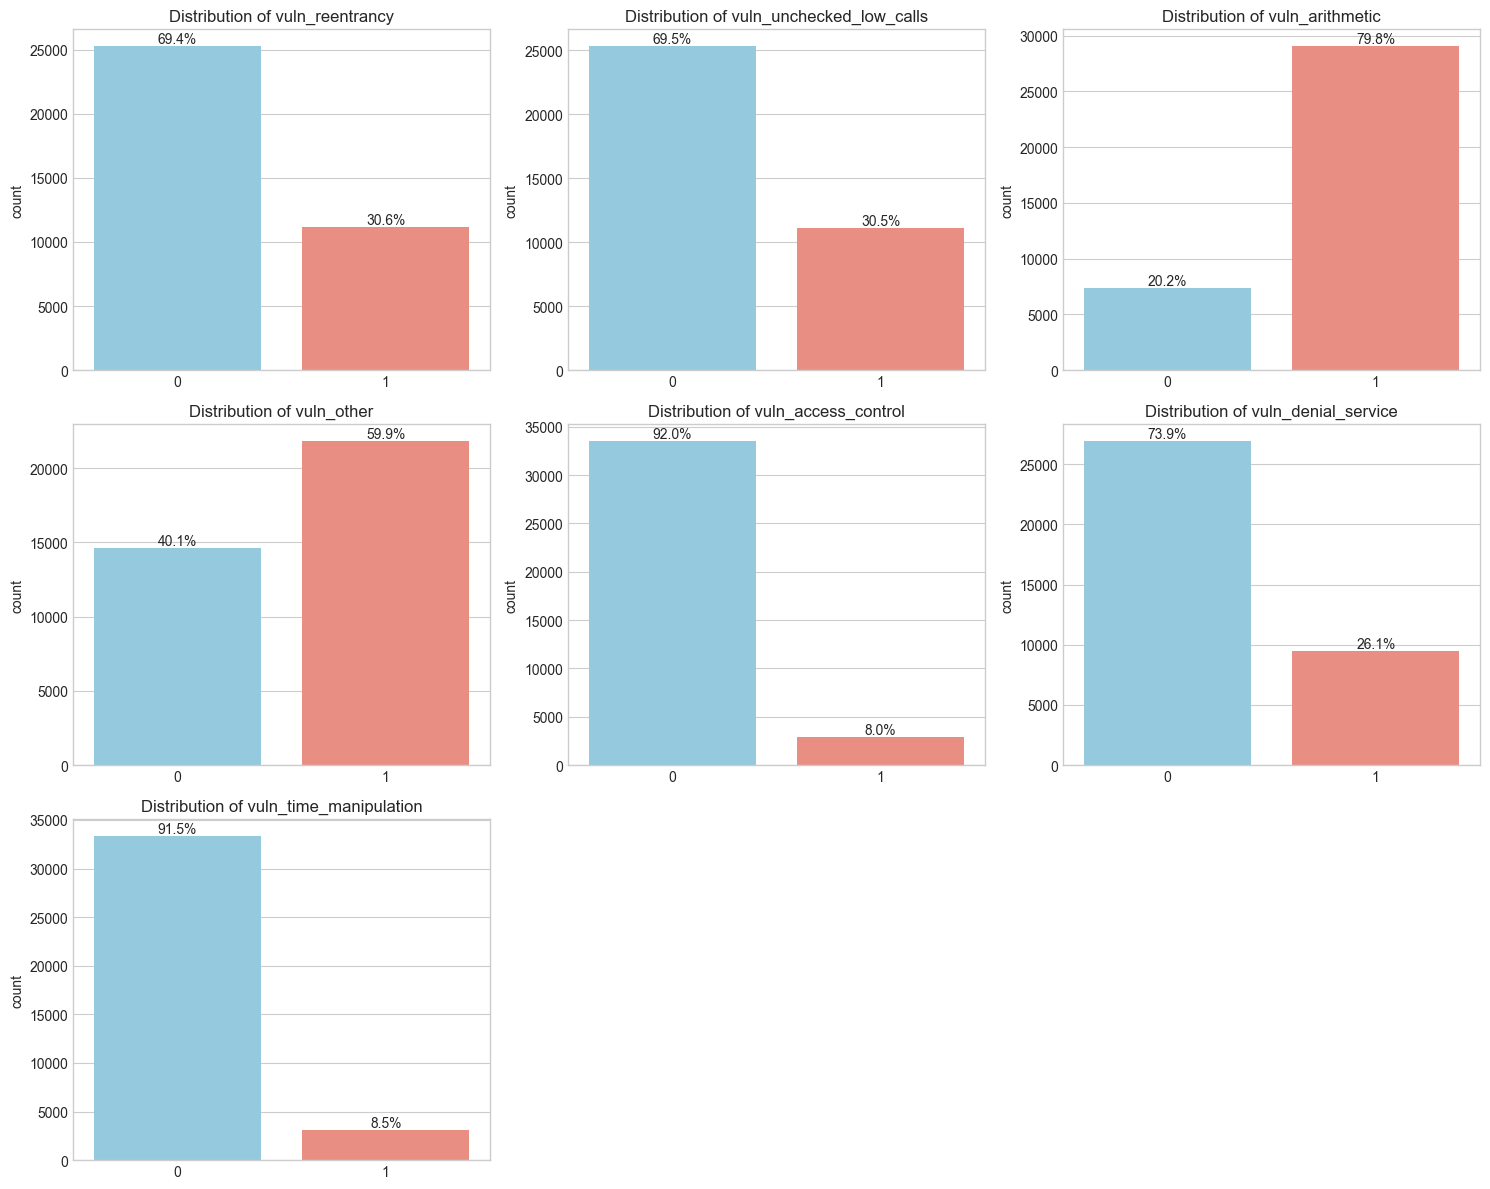

In [31]:
target_columns = [col for col in train_df.columns if col.startswith(main_config.TARGET_COLUMN_PREFIX)]
print(f"\nIdentified target columns: {target_columns}")

        # Построение графиков для каждой целевой переменной
num_targets = len(target_columns)
        # Определим количество строк и столбцов для сетки графиков
cols_grid = 3 # Например, 3 графика в ряд
rows_grid = (num_targets + cols_grid - 1) // cols_grid 

if num_targets > 0:
            fig, axes = plt.subplots(rows_grid, cols_grid, figsize=(5 * cols_grid, 4 * rows_grid))
            axes = axes.flatten() # Преобразуем в одномерный массив для удобства итерации

            for i, col in enumerate(target_columns):
                sns.countplot(x=col, data=train_df, ax=axes[i], palette=['skyblue', 'salmon'])
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel('') # Убрать подпись оси X для компактности
                # Добавить процентные соотношения на график
                total = len(train_df[col])
                for p in axes[i].patches:
                    percentage = f'{100 * p.get_height() / total:.1f}%'
                    x_patch = p.get_x() + p.get_width() / 2
                    y_patch = p.get_height()
                    axes[i].annotate(percentage, (x_patch, y_patch), ha='center', va='bottom')
                
                print(f"\nValue counts for {col} (Normalized):")
                print(train_df[col].value_counts(normalize=True))
            
            # Скрыть лишние subplots, если они есть
            for j in range(i + 1, len(axes)):
                fig.delaxes(axes[j])

            plt.tight_layout() # Для лучшего расположения графиков
            plt.show()
else:
            print("No target columns found with the specified prefix.")

In [32]:
print("\nMissing values per column:")
print(train_df.isnull().sum())


Missing values per column:
address                     0
sourcecode                  0
reentrancy                  0
unchecked_low_calls         0
arithmetic                  0
Other                       0
access_control              0
denial_service              0
time_manipulation           0
vuln_reentrancy             0
vuln_unchecked_low_calls    0
vuln_arithmetic             0
vuln_other                  0
vuln_access_control         0
vuln_denial_service         0
vuln_time_manipulation      0
code_char_length            0
dtype: int64


In [34]:
from tokenizers import ByteLevelBPETokenizer # Один из популярных токенизаторов
from transformers import AutoTokenizer # Универсальный загрузчик токенизаторов

In [35]:
tokenizer_name = "microsoft/codebert-base" # или "roberta-base" или "huggingface/CodeBERTa-small-v1"

try:
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    print(f"Successfully loaded tokenizer: {tokenizer_name}")
except Exception as e:
    print(f"Could not load tokenizer {tokenizer_name}. Error: {e}")
    print("Attempting to use a more generic RoBERTa tokenizer as a fallback...")
    try:
        tokenizer_name = "roberta-base" # Общий токенизатор, хорошо работает с кодом
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        print(f"Successfully loaded tokenizer: {tokenizer_name}")
    except Exception as e_fallback:
        print(f"Could not load fallback tokenizer {tokenizer_name}. Error: {e_fallback}")
        print("Please ensure you have an internet connection and the tokenizer name is correct.")
        print("You might need to install specific dependencies for some tokenizers.")
        # Если и это не сработает, нужно будет разбираться с окружением или выбрать другой токенизатор.
        assert False, "Tokenizer loading failed."

Successfully loaded tokenizer: microsoft/codebert-base


In [36]:
# Пример токенизации одного контракта
sample_code = train_df[main_config.SOURCE_CODE_COLUMN].iloc[0]
print(f"\nSample contract code (first 500 chars):\n{sample_code[:500]}")

tokens = tokenizer.tokenize(sample_code)
print(f"\nTokens for the sample contract (first 30 tokens):\n{tokens[:30]}")

token_ids = tokenizer.encode(sample_code, truncation=False) # Не обрезаем пока, чтобы посчитать реальную длину
print(f"\nToken IDs for the sample contract (first 30 token IDs):\n{token_ids[:30]}")
print(f"Total tokens in sample contract: {len(token_ids)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (1130 > 512). Running this sequence through the model will result in indexing errors



Sample contract code (first 500 chars):
  require(msg.valueH(address referral) public payable {2715000;

Tokens for the sample contract (first 30 tokens):
['pr', 'ag', 'ma', 'Ġsolid', 'ity', 'Ġ^', '0', '.', '4', '.', '25', ';', 'č', 'Ġcontract', 'Ġone', '_', 'eight', 'Ġ{', 'č', 'Ġ', 'Ġusing', 'ĠSafe', 'Math', 'Ġfor', 'Ġuint', '256', ';', 'č', 'Ġ', 'Ġmapping']

Token IDs for the sample contract (first 30 token IDs):
[0, 4862, 1073, 1916, 2705, 1571, 37249, 288, 4, 306, 4, 1244, 131, 50121, 1355, 65, 1215, 19491, 25522, 50121, 1437, 634, 13793, 44853, 13, 49315, 24554, 131, 50121, 1437]
Total tokens in sample contract: 1132


In [37]:
# Теперь применим токенизацию ко всему обучающему датасету, чтобы посмотреть на длины
# Это может занять некоторое время для большого датасета!
# Мы будем считать только количество токенов, не сохраняя сами токены в DataFrame пока, чтобы сэкономить память.
def count_tokens(code_text):
    if pd.isna(code_text): # Обработка возможных NaN, если они есть
        return 0
    return len(tokenizer.encode(str(code_text), truncation=False)) # truncation=False чтобы посчитать полную длину

print("\nCalculating token counts for all contracts in training data... (this may take a while)")
train_df['code_token_count'] = train_df[main_config.SOURCE_CODE_COLUMN].apply(count_tokens)
print("Token counts calculation complete.")


Calculating token counts for all contracts in training data... (this may take a while)
Token counts calculation complete.


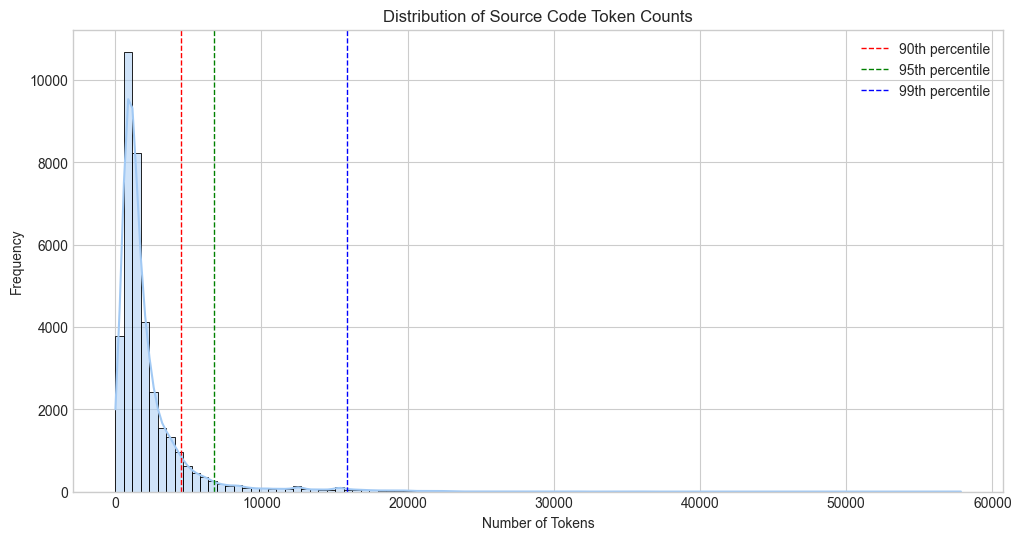

In [38]:
# Анализ длины кода в токенах
plt.figure(figsize=(12, 6))
sns.histplot(train_df['code_token_count'], bins=100, kde=True)
plt.title('Distribution of Source Code Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.axvline(train_df['code_token_count'].quantile(0.90), color='red', linestyle='dashed', linewidth=1, label='90th percentile')
plt.axvline(train_df['code_token_count'].quantile(0.95), color='green', linestyle='dashed', linewidth=1, label='95th percentile')
plt.axvline(train_df['code_token_count'].quantile(0.99), color='blue', linestyle='dashed', linewidth=1, label='99th percentile')
# Установим лимит для оси X, если есть очень большие выбросы, чтобы график был читабельнее
# Например, ограничим 99.5-м перцентилем, если нужно
# x_limit = train_df['code_token_count'].quantile(0.995)
# plt.xlim(0, x_limit if x_limit > 0 else train_df['code_token_count'].max()) # Убедимся, что лимит не нулевой
plt.legend()
plt.show()


In [45]:
print("\nDescriptive statistics for code token count:")
print(train_df['code_token_count'].describe(percentiles=[.50, .75, .90, .95, .99, .995, .999]))

# Теперь мы можем более обоснованно выбрать MAX_CODE_LENGTH (в токенах) для main_config.py
# Например, если 95-й перцентиль равен 1024 токенам, мы можем выбрать это значение.
# Текущее значение в main_config.py: main_config.MAX_CODE_LENGTH (которое было 512)
print(f"\nCurrent MAX_CODE_LENGTH in config: {main_config.MAX_TOTAL_TOKENS}")
# Подумайте, какое значение будет оптимальным на основе нового графика.
# Например, если 95-й перцентиль около 1000, а 99-й около 2000,
# можно выбрать что-то вроде 1024 или 1536.
# Это значение потом будем использовать при подготовке данных для модели.


Descriptive statistics for code token count:
count    36477.000000
mean      2249.701373
std       2891.539912
min         10.000000
50%       1330.000000
75%       2439.000000
90%       4471.000000
95%       6750.600000
99%      15852.920000
99.5%    18664.200000
99.9%    24597.000000
max      57845.000000
Name: code_token_count, dtype: float64

Current MAX_CODE_LENGTH in config: 4096


In [46]:
test_file_path = main_config.PROCESSED_DATA_DIR / main_config.TEST_DATASET_FILENAME
try:
        test_df = pd.read_csv(test_file_path)
        print(f"Successfully loaded {test_file_path}")
        print(f"Shape of test data: {test_df.shape}")
except FileNotFoundError:
        print(f"ERROR: Test data file not found at {test_file_path}")
        assert False, "Test data not found"

    # Импортируем нашу новую функцию токенизации
from src.feature_engineering.tokenization import tokenize_and_chunk_code, get_tokenizer

Successfully loaded E:\Code\diplom\ml_service\data\processed\test_contracts.csv
Shape of test data: (9120, 16)


In [47]:
TOKENIZER_NAME = "microsoft/codebert-base"
tokenizer_instance = get_tokenizer(tokenizer_name=TOKENIZER_NAME)
    
print(f"Using Tokenizer: {TOKENIZER_NAME}")
print(f"Target MAX_TOTAL_TOKENS: {main_config.MAX_TOTAL_TOKENS}")
print(f"Target MODEL_CHUNK_SIZE: {main_config.MODEL_CHUNK_SIZE}")
print(f"Target CHUNK_OVERLAP: {main_config.CHUNK_OVERLAP}")

Using Tokenizer: microsoft/codebert-base
Target MAX_TOTAL_TOKENS: 4096
Target MODEL_CHUNK_SIZE: 512
Target CHUNK_OVERLAP: 64


In [50]:
def process_dataframe_for_chunking(df, code_column, tokenizer_instance):
        all_chunked_data = []
        original_indices = [] # Чтобы потом сопоставить с метками
    
        print(f"Processing {len(df)} contracts for chunking...")
        for index, row in df.iterrows():
            code = str(row[code_column]) if pd.notna(row[code_column]) else ""
            
            # Применяем чанкинг к каждому контракту
            # Используем параметры из main_config по умолчанию для tokenize_and_chunk_code
            chunked_contract_outputs = tokenize_and_chunk_code(code, tokenizer_instance) 
            
            if chunked_contract_outputs: # Если были сгенерированы чанки
                all_chunked_data.extend(chunked_contract_outputs)
                # Для каждого чанка сохраняем исходный индекс строки из DataFrame
                original_indices.extend([index] * len(chunked_contract_outputs))
            # Если контракт пустой и чанков нет, он просто не войдет в датасет чанков
            
            if (index + 1) % 1000 == 0: # Логирование прогресса
                print(f"  Processed {index + 1}/{len(df)} contracts...")
        
        print(f"Chunking complete. Generated {len(all_chunked_data)} total chunks.")
        return all_chunked_data, original_indices

In [51]:
# Токенизация и чанкинг обучающих данных
print("\nStarting chunking for training data...")
train_chunks_list, train_original_indices = process_dataframe_for_chunking(
        train_df, main_config.SOURCE_CODE_COLUMN, tokenizer_instance
    )
    


Starting chunking for training data...
Processing 36477 contracts for chunking...
  Processed 1000/36477 contracts...
  Processed 2000/36477 contracts...
  Processed 3000/36477 contracts...
  Processed 4000/36477 contracts...
  Processed 5000/36477 contracts...
  Processed 6000/36477 contracts...
  Processed 7000/36477 contracts...
  Processed 8000/36477 contracts...
  Processed 9000/36477 contracts...
  Processed 10000/36477 contracts...
  Processed 11000/36477 contracts...
  Processed 12000/36477 contracts...
  Processed 13000/36477 contracts...
  Processed 14000/36477 contracts...
  Processed 15000/36477 contracts...
  Processed 16000/36477 contracts...
  Processed 17000/36477 contracts...
  Processed 18000/36477 contracts...
  Processed 19000/36477 contracts...
  Processed 20000/36477 contracts...
  Processed 21000/36477 contracts...
  Processed 22000/36477 contracts...
  Processed 23000/36477 contracts...
  Processed 24000/36477 contracts...
  Processed 25000/36477 contracts...
 

In [52]:
print("\nStarting chunking for test data...")
test_chunks_list, test_original_indices = process_dataframe_for_chunking(
        test_df, main_config.SOURCE_CODE_COLUMN, tokenizer_instance
    )
    


Starting chunking for test data...
Processing 9120 contracts for chunking...
  Processed 1000/9120 contracts...
  Processed 2000/9120 contracts...
  Processed 3000/9120 contracts...
  Processed 4000/9120 contracts...
  Processed 5000/9120 contracts...
  Processed 6000/9120 contracts...
  Processed 7000/9120 contracts...
  Processed 8000/9120 contracts...
  Processed 9000/9120 contracts...
Chunking complete. Generated 38703 total chunks.


In [53]:
# Подготовка меток для каждого чанка
    # Метки для всех чанков одного контракта будут одинаковыми
target_columns = [col for col in train_df.columns if col.startswith(main_config.TARGET_COLUMN_PREFIX)]
    
if train_chunks_list: # Если есть чанки
        # train_df.loc[train_original_indices] выберет строки из train_df в том порядке и с теми повторениями,
        # которые соответствуют нашим чанкам.
        train_chunk_labels_df = train_df.loc[train_original_indices, target_columns]
        train_chunk_labels = torch.tensor(train_chunk_labels_df.values, dtype=torch.float)
        print(f"Train chunks: {len(train_chunks_list)}, Train chunk labels shape: {train_chunk_labels.shape}")
else:
        train_chunk_labels = torch.empty((0, len(target_columns)), dtype=torch.float) # Пустой тензор, если нет чанков
        print("No chunks generated for training data.")

if test_chunks_list:
        test_chunk_labels_df = test_df.loc[test_original_indices, target_columns]
        test_chunk_labels = torch.tensor(test_chunk_labels_df.values, dtype=torch.float)
        print(f"Test chunks: {len(test_chunks_list)}, Test chunk labels shape: {test_chunk_labels.shape}")
else:
        test_chunk_labels = torch.empty((0, len(target_columns)), dtype=torch.float)
        print("No chunks generated for test data.")


Train chunks: 154231, Train chunk labels shape: torch.Size([154231, 7])
Test chunks: 38703, Test chunk labels shape: torch.Size([38703, 7])


In [55]:
PROCESSED_DATA_DIR_CHUNKS = main_config.PROCESSED_DATA_DIR / "chunked_data"
PROCESSED_DATA_DIR_CHUNKS.mkdir(parents=True, exist_ok=True) # Создаем директорию, если ее нет

    # Формируем имя файла на основе параметров
file_suffix = f"t{main_config.MAX_TOTAL_TOKENS}_c{main_config.MODEL_CHUNK_SIZE}_o{main_config.CHUNK_OVERLAP}_{TOKENIZER_NAME.replace('/', '_')}.pt"

PATH_TRAIN_CHUNKS = PROCESSED_DATA_DIR_CHUNKS / f"train_chunks_{file_suffix}"
PATH_TEST_CHUNKS = PROCESSED_DATA_DIR_CHUNKS / f"test_chunks_{file_suffix}"
PATH_TRAIN_CHUNK_LABELS = PROCESSED_DATA_DIR_CHUNKS / f"train_chunk_labels_{file_suffix}"
PATH_TEST_CHUNK_LABELS = PROCESSED_DATA_DIR_CHUNKS / f"test_chunk_labels_{file_suffix}"
PATH_TRAIN_ORIGINAL_INDICES = PROCESSED_DATA_DIR_CHUNKS / f"train_original_indices_{file_suffix}" # Для возможной отладки или связи с исходными данными
PATH_TEST_ORIGINAL_INDICES = PROCESSED_DATA_DIR_CHUNKS / f"test_original_indices_{file_suffix}"
if train_chunks_list:
        print(f"\nSaving train chunks to: {PATH_TRAIN_CHUNKS}")
        torch.save(train_chunks_list, PATH_TRAIN_CHUNKS)
        print(f"Saving train chunk labels to: {PATH_TRAIN_CHUNK_LABELS}")
        torch.save(train_chunk_labels, PATH_TRAIN_CHUNK_LABELS)
        torch.save(train_original_indices, PATH_TRAIN_ORIGINAL_INDICES)

if test_chunks_list:
        print(f"Saving test chunks to: {PATH_TEST_CHUNKS}")
        torch.save(test_chunks_list, PATH_TEST_CHUNKS)
        print(f"Saving test chunk labels to: {PATH_TEST_CHUNK_LABELS}")
        torch.save(test_chunk_labels, PATH_TEST_CHUNK_LABELS)
        torch.save(test_original_indices, PATH_TEST_ORIGINAL_INDICES)

print("\nChunked data and labels saved.")


Saving train chunks to: E:\Code\diplom\ml_service\data\processed\chunked_data\train_chunks_t4096_c512_o64_microsoft_codebert-base.pt
Saving train chunk labels to: E:\Code\diplom\ml_service\data\processed\chunked_data\train_chunk_labels_t4096_c512_o64_microsoft_codebert-base.pt
Saving test chunks to: E:\Code\diplom\ml_service\data\processed\chunked_data\test_chunks_t4096_c512_o64_microsoft_codebert-base.pt
Saving test chunk labels to: E:\Code\diplom\ml_service\data\processed\chunked_data\test_chunk_labels_t4096_c512_o64_microsoft_codebert-base.pt

Chunked data and labels saved.
